In [29]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [31]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()


In [32]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

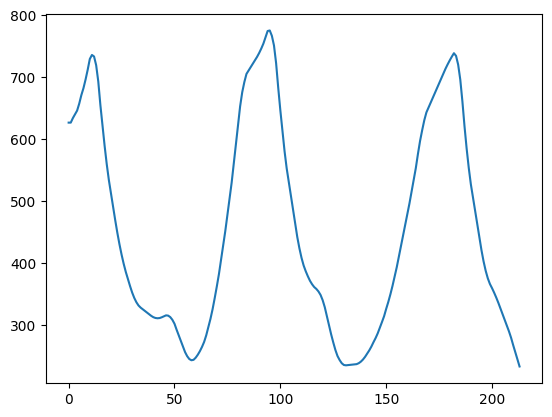

In [33]:
# plot the ball position
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [34]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff() # calculate the difference between the current and previous value

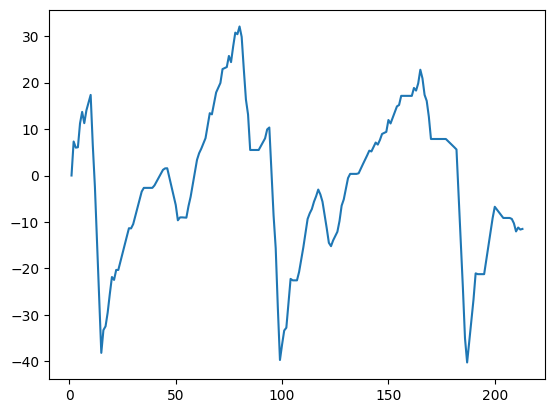

In [36]:
# plot the delta y
plt.plot(df_ball_positions['delta_y'])


In [37]:
df_ball_positions['ball_hit']=0 # create a new column to store the ball hit information

In [ ]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff() # calculate the difference between the current and previous value

minimum_change_for_hit = 25
for i in range(1,len(df_ball_positions) - int(minimum_change_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0
        # check the next few frames to see if the ball is hit or not  
        # iloc is used to access the index of the dataframe
        for change_frame in range(i+1, i+int(minimum_change_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0          
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1
        # if the change count is greater than the minimum change for hit, then the ball is hit
        if change_count >= minimum_change_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_df_ball_hits=df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()


C:\Users\Afonso\AppData\Local\Temp\ipykernel_16024\4147867652.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\Afonso\AppData\Local\Temp\ipykernel_16024\4147867652.py:20: SettingWithCopy

In [40]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,776.865967,717.329407,796.805969,738.392761,727.861084,735.918768,6.522986,1
42,926.624927,306.314795,938.985937,319.178357,312.746576,311.145630,-0.457400,1
46,935.181335,309.623718,951.197205,328.391846,319.007782,315.838584,1.558869,1
58,925.881006,240.971063,939.040503,253.990076,247.480569,243.406393,-1.957890,1
95,624.777252,748.892578,642.158112,766.700134,757.796356,775.404517,0.871814,1
131,716.963684,229.096054,729.237213,242.786392,235.941223,235.241821,-0.557404,1
182,1294.893188,739.124268,1314.162109,760.560242,749.842255,738.732208,5.601685,1
